In [103]:
import numpy as np

#from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

## Anemometro a filo caldo

Analisi dati e determinazione **frequenza di Strouhal**

## Lettura dati

- seleziona file di *samples*
- definisce se usare finestra di **Hanning** o *rettangolare*

In [104]:
#n_samples = '25ks'
n_samples = '75ks'
#n_samples = '150ks'

filename = 'Strouhal'+n_samples+'.csv'

hann = True

In [105]:
header_size = 14

# header

with open('./data/'+filename) as myfile:
    head = [next(myfile).split(',')[:-1] for x in range(header_size)]

#print(head)

# dataset

data = np.genfromtxt('./data/'+filename, skip_header=header_size)

In [106]:
sample_size = int(head[0][1])
dt = float(head[10][1])

In [107]:
sample_size

75000

In [108]:
dt

4e-05

In [109]:
assert(sample_size == len(data))

## Parametri del dataset

In [110]:
T0 = dt*sample_size
df = 1/T0
print('intervallo di campionamento: {0} [s]'.format(dt))
print('tempo di campionamento: {0} [s]'.format(T0))
print('frequenza di campionamento: {0:.4} [Hz]'.format(1/dt))
print('frequenza di Nyquist: {0:.4} [Hz]'.format(1/(2*dt)))
print('risoluzione in frequenza: {0} [Hz]'.format(df))


intervallo di campionamento: 4e-05 [s]
tempo di campionamento: 3.0000000000000004 [s]
frequenza di campionamento: 2.5e+04 [Hz]
frequenza di Nyquist: 1.25e+04 [Hz]
risoluzione in frequenza: 0.33333333333333326 [Hz]


## Conversione dati

Legge dello strumento:

$$\left[\frac{m}{s}\right] \leftarrow \left[V\right]$$

$$u = \frac{\left(V^2 - k\right)^2}{h^2} $$



In [111]:
h = 5.5e4
k = .94

In [112]:
t = np.linspace(0,sample_size*dt,sample_size, endpoint=False)

In [113]:
s1 = (data**2 - k)**2/h**2

**Media** e **rms** del segnale

In [114]:
sig_mean = np.mean(s1)
sig_rms = np.sqrt(s1.dot(s1)/s1.size)

print("media segnale: {0:.5f}".format(sig_mean))
print("rms segnale: {0:.5f}".format(sig_rms))

media segnale: 0.55228
rms segnale: 0.56692


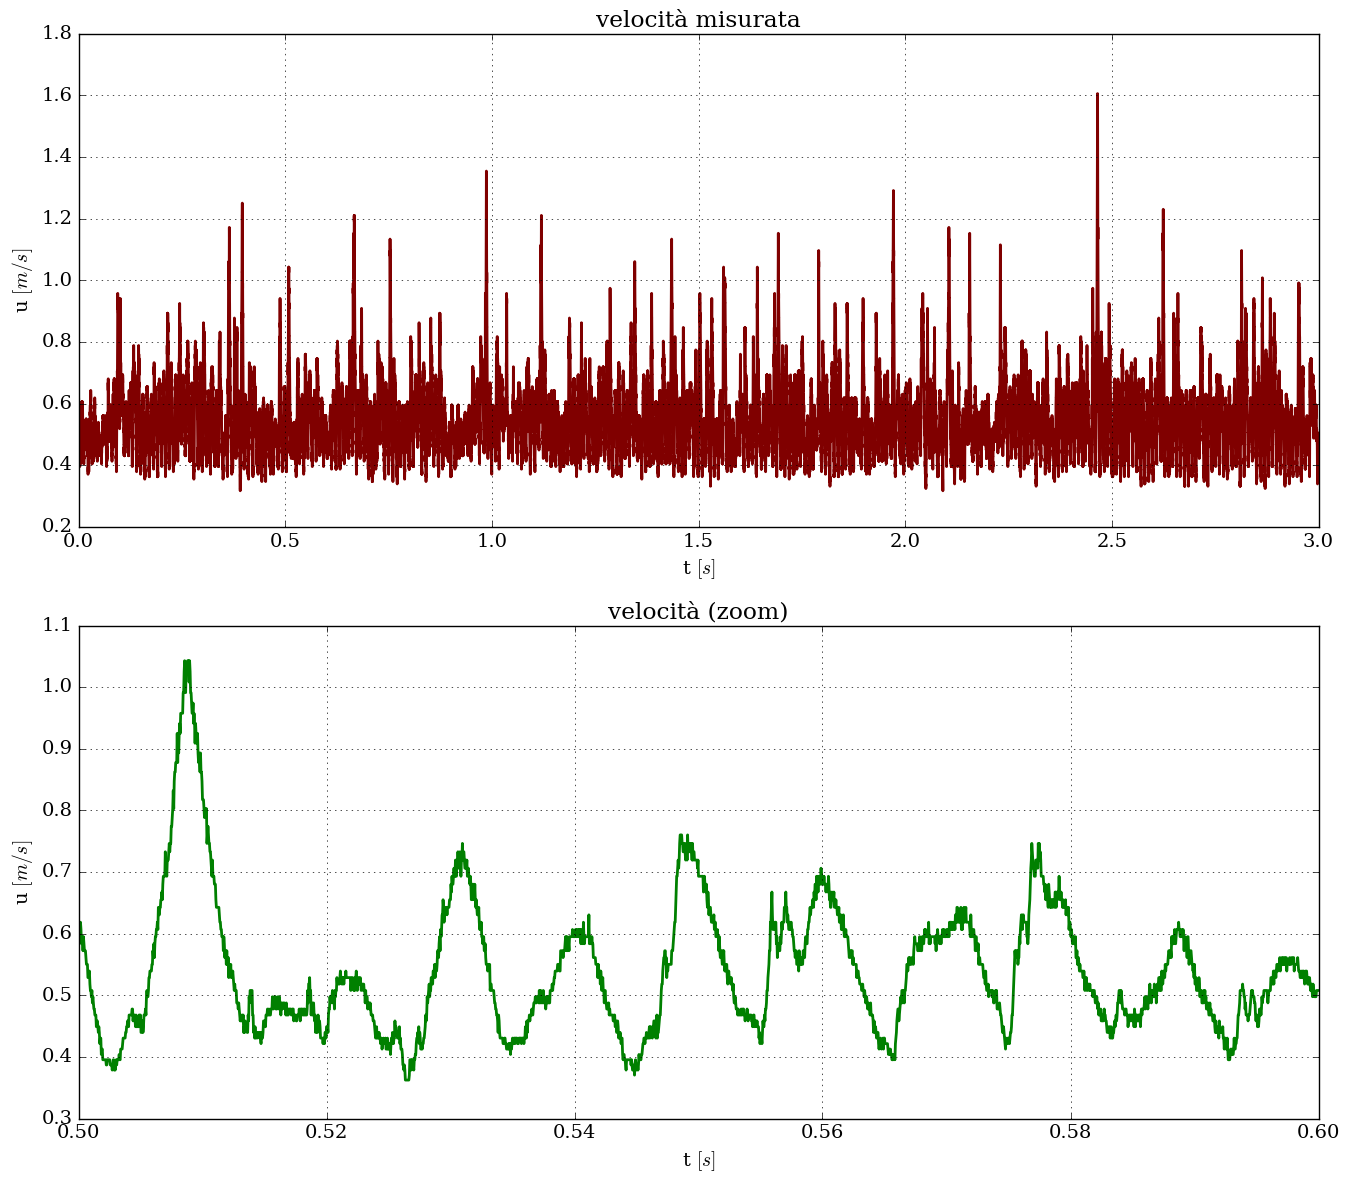

In [115]:
plt.figure(figsize=(16,14), dpi=300)
plt.subplot(211)
plt.xlabel(r't $[s]$')
plt.ylabel(r'u $[m/s]$')
plt.title(r'velocità misurata')
plt.plot(t,s1,lw=2., color=(0.5,0.,0.))
#plt.xlim([0.,0.1])
#plt.ylim([-0.2, 1.6])
plt.grid()
plt.subplot(212)
plt.xlabel(r't $[s]$')
plt.ylabel('u $[m/s]$')
plt.title(r'velocità (zoom)')
plt.plot(t[(t>0.5) & (t<0.6)],s1[(t>0.5) & (t<0.6)],lw=2., color=(0.,0.5,0.))
#plt.xlim([0.,0.1])
#plt.ylim([-0.2, 1.6])
plt.grid()

## Hanning window o rettangolare

In [116]:
if hann:
    s1f = s1*np.hanning(sample_size)
else:
    s1f = s1

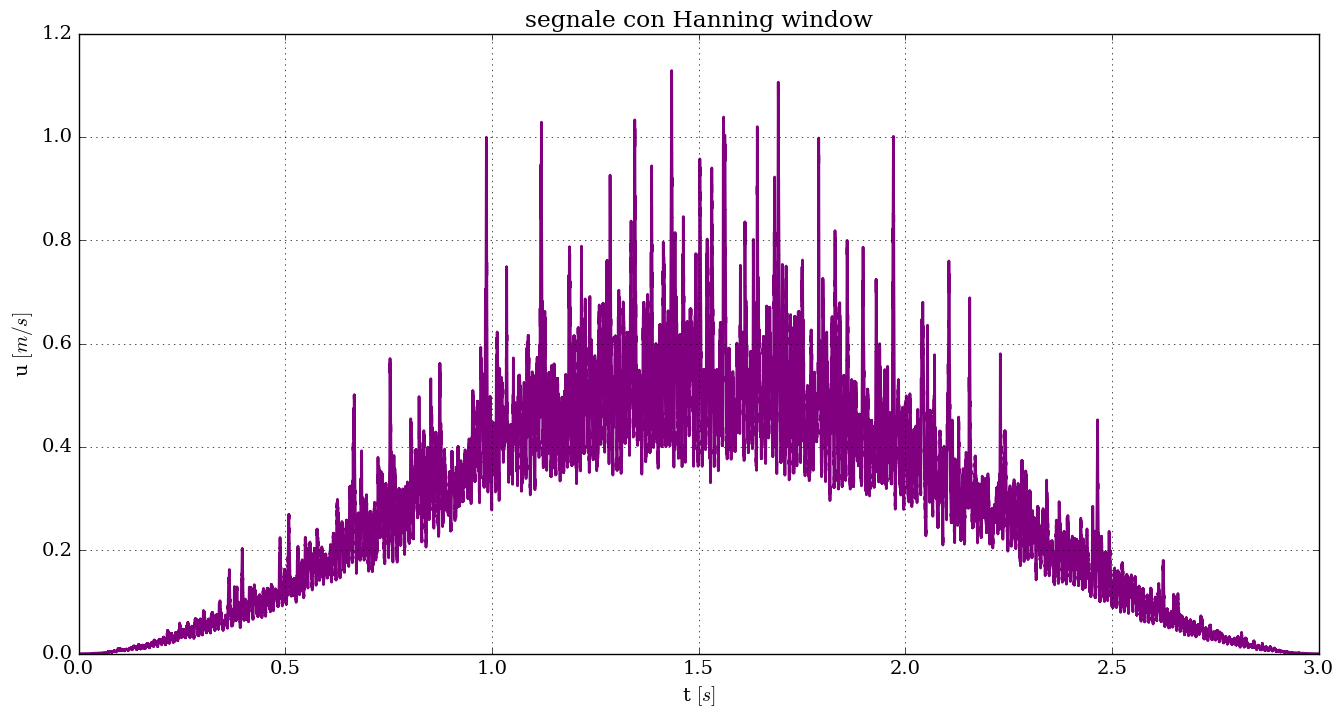

In [117]:
plt.figure(figsize=(16,8), dpi=300)
plt.xlabel(r't $[s]$')
plt.ylabel(r'u $[m/s]$')
if hann:
    plt.title(r'segnale con Hanning window')
else:
    plt.title(r'segnale con finestra rettangolare')
plt.plot(t,s1f,lw=2., color=(0.5,0.,0.5))
#plt.xlim([0.,0.1])
#plt.ylim([-0.2, 1.6])
plt.grid()


## Analisi in frequenza

In [118]:
# normalizzato con sqrt(n)
tr1 = np.fft.fft(s1f)

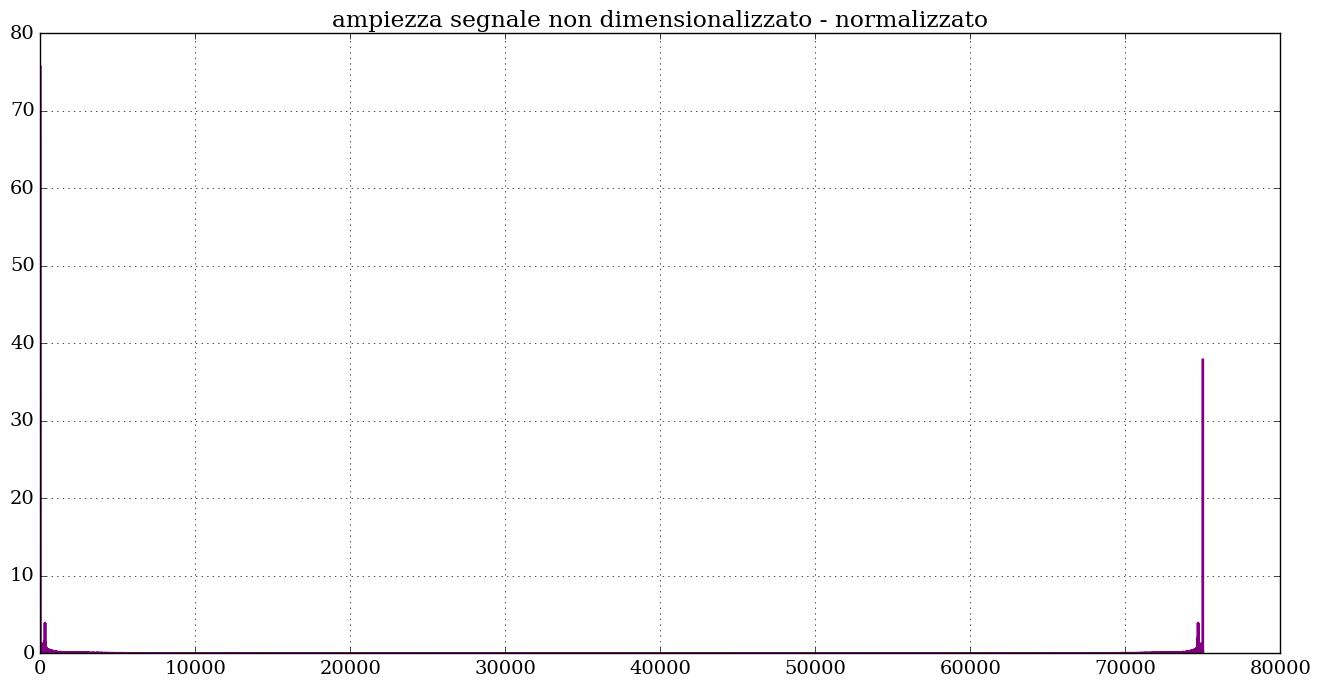

In [119]:
plt.figure(figsize=(16,8), dpi=300)
#plt.xlabel(r't $[s]$')
#plt.ylabel(r'u $[m/s]$')
plt.title(r'ampiezza segnale non dimensionalizzato - normalizzato')
plt.plot(np.abs(tr1)/np.sqrt(sample_size),lw=2., color=(0.5,0.,0.5))
#plt.xlim([0.,0.1])
#plt.ylim([-0.2, 1.6])
plt.grid()

In [120]:
#f1 = np.fft.fftfreq(sample_size, d=dt)
f1 = np.array([i*(sample_size-1)/(T0*sample_size -1) for i in range(sample_size)])

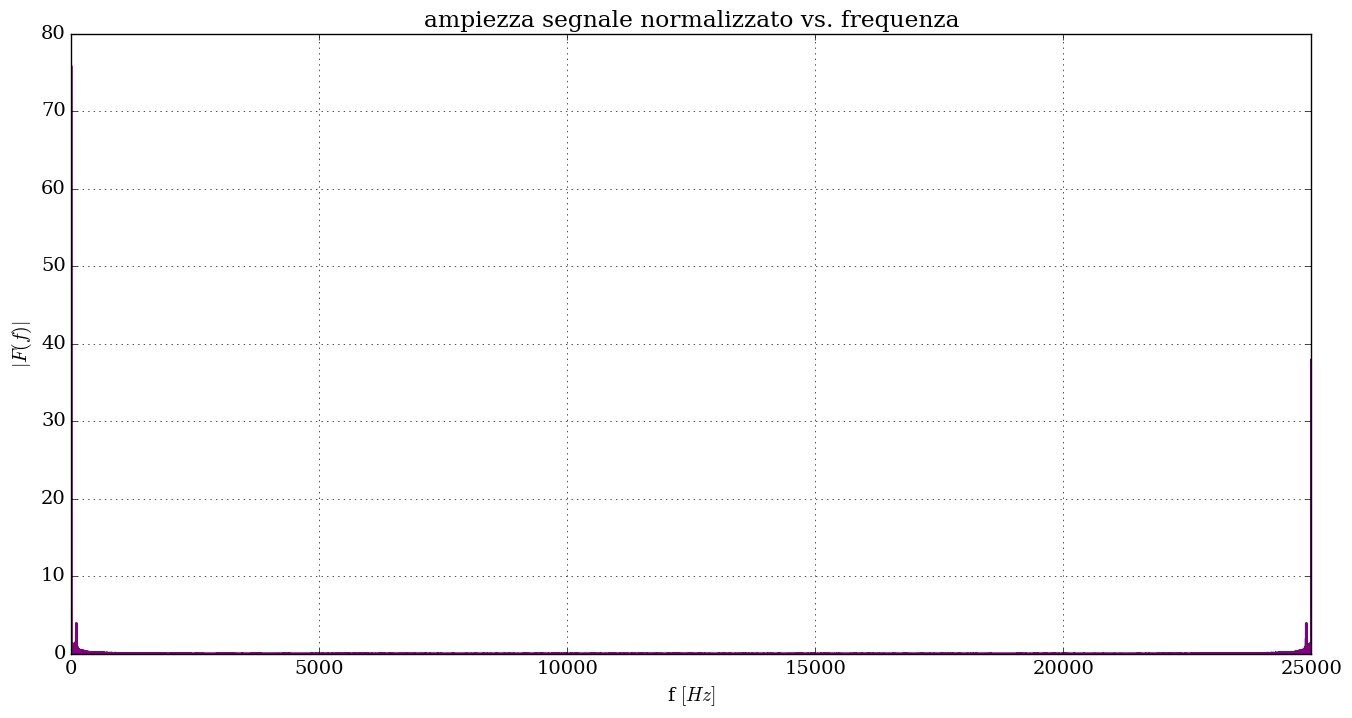

In [121]:
plt.figure(figsize=(16,8), dpi=300)
plt.xlabel(r'f $[Hz]$')
plt.ylabel(r'$|F(f)|$')
plt.title(r'ampiezza segnale normalizzato vs. frequenza')
plt.plot(f1,np.abs(tr1) /np.sqrt(sample_size),lw=2., color=(0.5,0.,0.5))
#plt.xlim([0.,0.1])
#plt.ylim([-0.2, 1.6])
plt.grid()

## Power spectral density

In [122]:
f2 = np.fft.fftfreq(sample_size, dt)
psd = ( np.abs(tr1[0:sample_size//2])**2)/sample_size

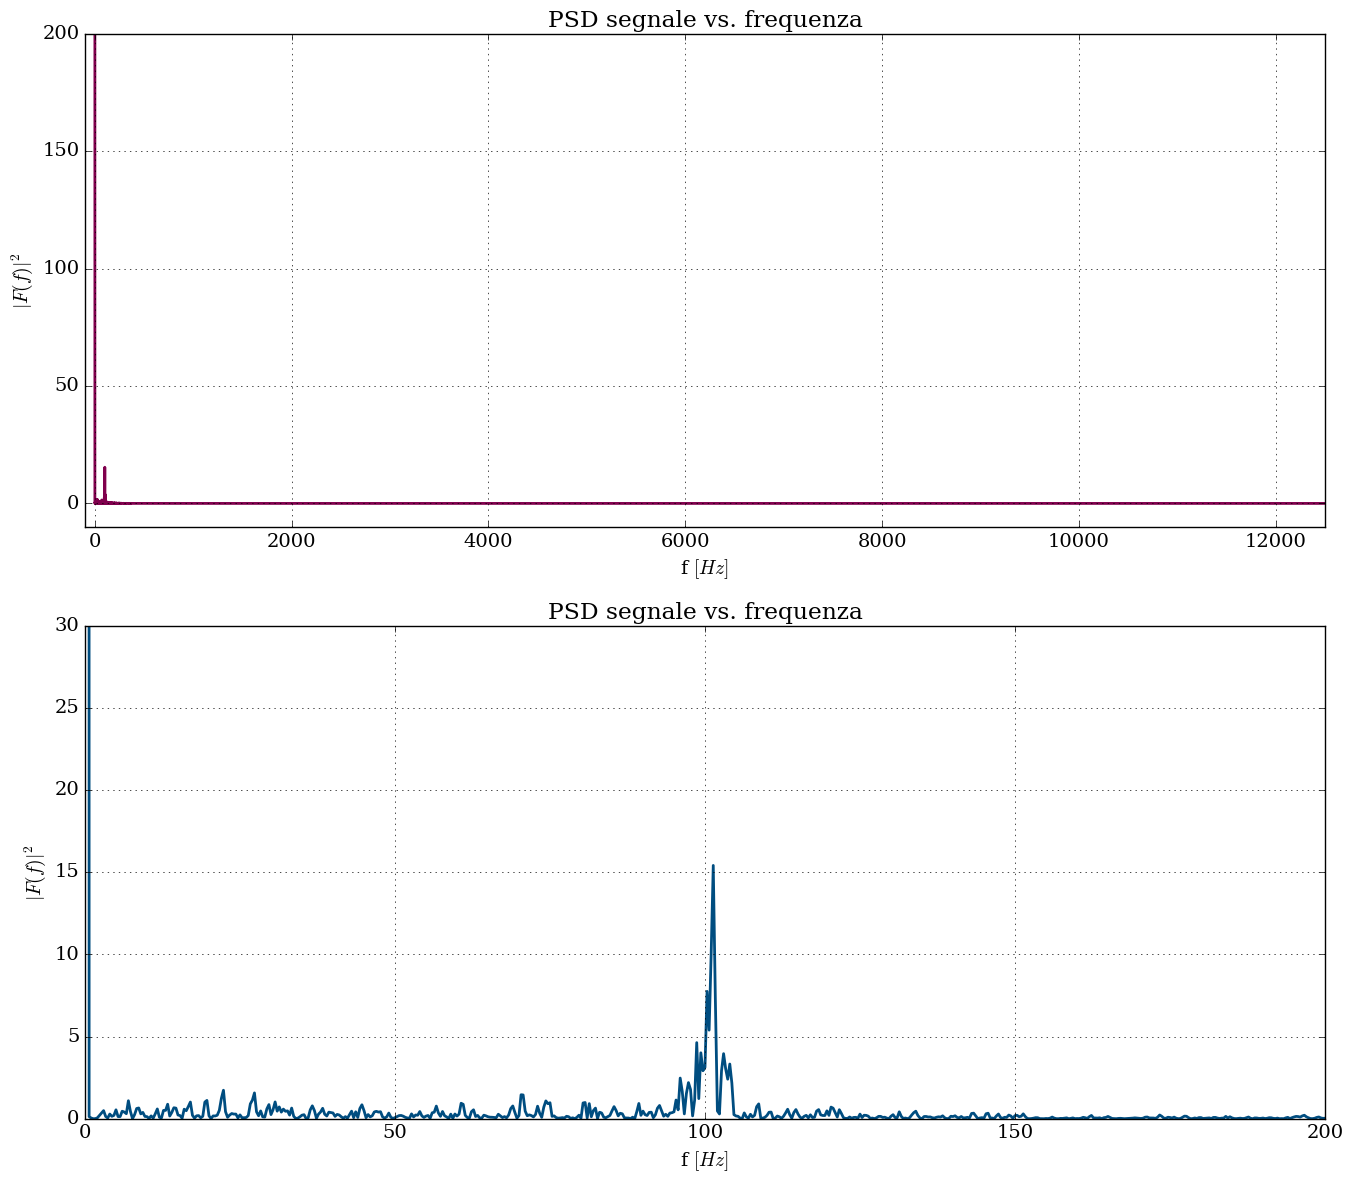

In [123]:
i1 = np.argmax(f2>=200)
plt.figure(figsize=(16,14), dpi=300)
plt.subplot(211)
plt.xlabel(r'f $[Hz]$')
plt.ylabel(r'$|F(f)|^2$')
plt.title(r'PSD segnale vs. frequenza')
plt.plot(f2[:sample_size//2],psd,lw=2., color=(0.5,0.,0.3))
plt.xlim([-100,12500])
plt.ylim([-10, 200])
plt.grid()
plt.subplot(212)
plt.xlabel(r'f $[Hz]$')
plt.ylabel(r'$|F(f)|^2$')
plt.title(r'PSD segnale vs. frequenza')
plt.plot(f2[:i1],psd[:i1],lw=2., color=(0.,0.3,0.5))
plt.xlim([0,200])
plt.ylim([0,30]);
plt.grid()

### Rimozione componente costante

In [124]:
i_fmin = np.argmax(f2>=2.)
psd_filt = np.array([psd[i] if i>i_fmin else 0. for i in range(len(psd))])

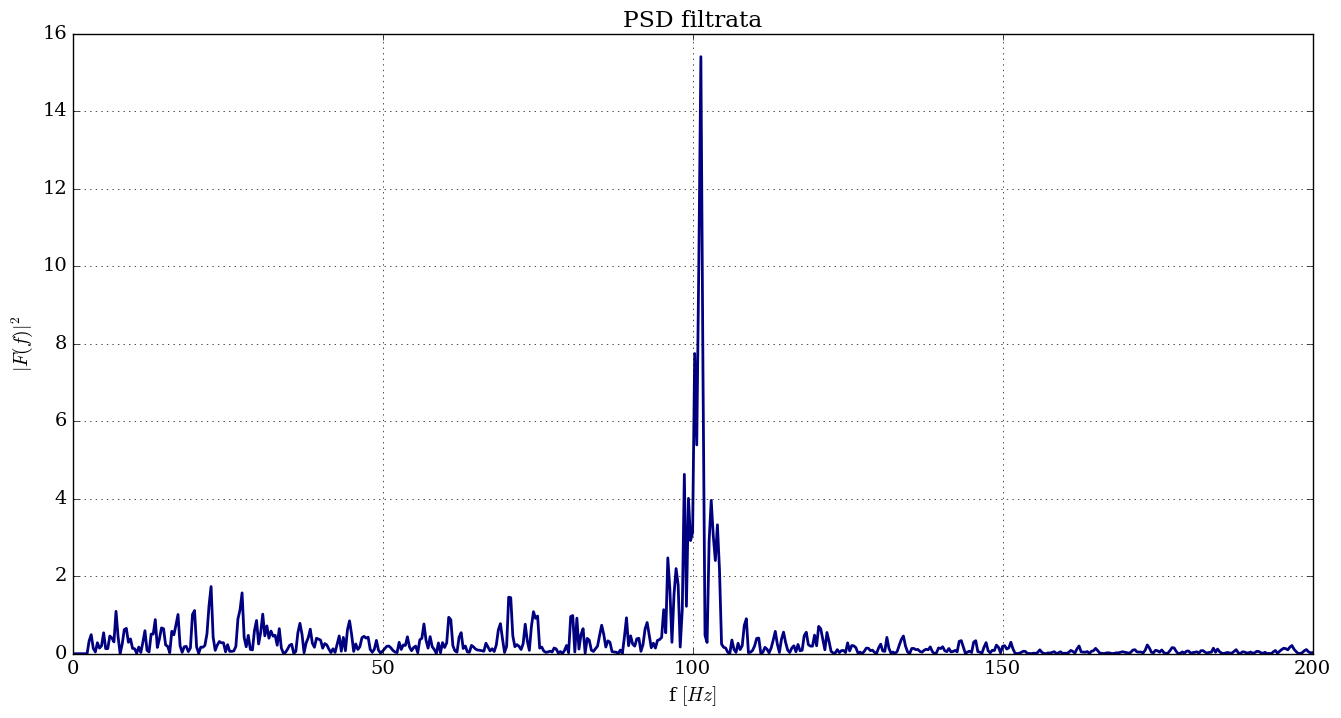

In [125]:
plt.figure(figsize=(16,8), dpi=300)
plt.xlabel(r'f $[Hz]$')
plt.ylabel(r'$|F(f)|^2$')
plt.title(r'PSD filtrata')
plt.plot(f2[:i1],psd_filt[:i1],lw=2., color=(0.,0.,0.5))
#plt.xlim([0.,0.1])
#plt.ylim([-0.2, 1.6])
plt.grid()

In [126]:
i_max = np.argmax(psd_filt)
psd_max = psd_filt[i_max]
f_max = f2[i_max]

In [127]:
print("PSD massimo: {0:.6f}".format(psd_max))
print("frequenza del massimo: {0:.6f} [Hz]".format(f_max))

PSD massimo: 15.407346
frequenza del massimo: 101.333333 [Hz]


scrittura dati su un file

In [128]:
if hann:
    window = 'hann'
else:
    window = 'rect'

with open('./data/fpeak_'+n_samples+'_'+window+'.txt', 'w') as text_file:
    print("PSD massimo: {0:.6f}".format(psd_max), file=text_file)
    print("frequenza del massimo: {0:.6f} [Hz]".format(f_max), file=text_file)

## Rapporti segnale - rumore

**S/N ratio** su banda totale

In [129]:
tol = 0.1
peak_ind = psd > tol*psd_max

peakpoints = psd[peak_ind]

f3 = f2[:sample_size//2]

fcomp = f3[np.logical_not(peak_ind)]
psd_comp = psd[np.logical_not(peak_ind)]

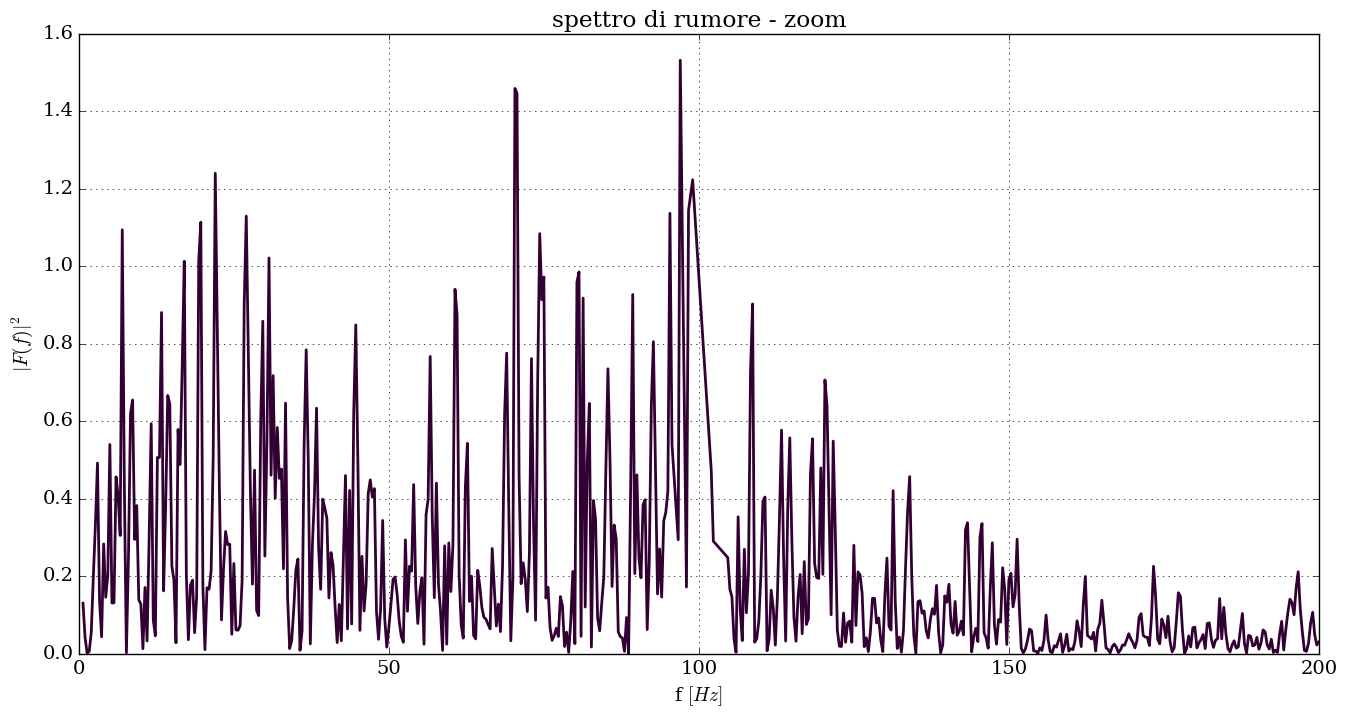

In [130]:
ip = np.argmax(fcomp>=200)

plt.figure(figsize=(16,8), dpi=300)
plt.xlabel(r'f $[Hz]$')
plt.ylabel(r'$|F(f)|^2$')
plt.title(r'spettro di rumore - zoom')
plt.plot(fcomp[:ip],psd_comp[:ip],lw=2., color=(0.2,0.,0.2))
#plt.xlim([0.,0.1])
#plt.ylim([-0.2, 1.6])
plt.grid()

Rapporto aree

In [131]:
A = np.sum(peakpoints)*df
B = np.sum(psd_comp)*df

snr1 = 10*np.log10(A/B)
snr1

17.101762655602283

Rapporto **picco** segnale vs. **media** rumore

In [132]:
B1 = np.mean(psd_comp)
snr2 = 10*np.log10(psd_max/B1)
snr2

36.110052770516788

### valori nell'intorno del picco

In [133]:
fmin = 60.
fmax = 140.

In [134]:
i_f1 = np.argmax(fcomp >= fmin)
i_f2 = np.argmax(fcomp >= fmax)

In [135]:
Bf = np.sum(psd_comp[i_f1:i_f2])*df
snr3 = 10*np.log10(A/Bf)
snr3

20.868282239271274

In [136]:
B1f = np.mean(psd_comp[i_f1:i_f2])
snr4 = 10*np.log10(psd_max/B1f)
snr4

17.582846903775867